# MIE 1624 Intro to Data Science and Analytics



> **1. Data Cleaning**
>> 
 **2. Exploratory Data Analysis**
>> 
 **3. Features Selection**
>> 
 **4. Model Implementation**
>> 
 **5. Model Tuning**
>> 
 **6. Testing and Discussion**

## 1. Data Cleaning

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns

In [10]:
#Reading Training File
income_train=pd.read_csv('/resources/income-training.csv', encoding='utf8')
print('\n\n\n size of the dataframe is', len(income_train))
income_train.head()




 size of the dataframe is 24421


,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
0,42,State-gov,179151,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<50K
1,28,Private,68021,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,30,United-States,<50K
2,24,Private,233499,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,50-100K
3,32,Self-emp-not-inc,168782,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,32,United-States,<50K
4,55,Self-emp-not-inc,105582,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,2228,0,50,United-States,<50K


In [11]:
#Reading Testing File
income_test=pd.read_csv('/resources/income-testing0.csv', encoding='utf8')
income_test.head()
income_test

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
0,57,Self-emp-not-inc,152030,Some-college,10,Married-civ-spouse,Sales,Wife,White,Female,0,0,25,United-States,50-100K
1,35,Private,341643,Bachelors,13,Never-married,Other-service,Other-relative,White,Male,0,0,50,United-States,<50K
2,26,Private,40915,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,25,United-States,<50K
3,27,Federal-gov,257124,Bachelors,13,Never-married,Transport-moving,Other-relative,White,Male,0,0,35,United-States,<50K
4,21,Private,256278,HS-grad,9,Never-married,Other-service,Other-relative,Other,Female,0,0,35,El-Salvador,<50K
5,28,Private,128055,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,<50K
6,34,Private,303187,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>100K
7,26,Private,205109,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<50K
8,26,Private,33610,HS-grad,9,Never-married,Transport-moving,Own-child,White,Male,0,0,40,United-States,<50K
9,35,State-gov,167482,HS-grad,9,Never-married,Protective-serv,Own-child,White,Male,0,1980,40,United-States,<50K


# Data Cleaning
![alt text](https://cdn-images-1.medium.com/max/500/1*yWFQiGjlgHUVYeh4ELELyw.jpeg)


### Investigating the Missing data


![alt text](http://www.nationnews.com/IMG/675/76675/blocmissing1000-450x303.jpg?1503422588)

In [12]:
#Displaying only NaN rows 

income_train_NaN = income_train[income_train.isnull().any(axis=1)]
print('\nTotal rows containing NaN values is ',len(income_train_NaN),'\n\n')
print('Income Training data with Nan is\n')
income_train.head()



Total rows containing NaN values is  1767 


Income Training data with Nan is



,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
0,42,State-gov,179151,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<50K
1,28,Private,68021,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,30,United-States,<50K
2,24,Private,233499,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,50-100K
3,32,Self-emp-not-inc,168782,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,32,United-States,<50K
4,55,Self-emp-not-inc,105582,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,2228,0,50,United-States,<50K


In [13]:
# Knowing which columns have missing data

train_NaN=income_train.isnull().sum()
train_NaN
# Wrok Class, Occupation and Native country has the missing values
#now let's see what is the distribution of values of these columns, analyze their statistics


Age                 0
WorkClass        1384
FinalWeight         0
Education           0
EducationLvl        0
MaritalStatus       0
Occupation       1390
Relationship        0
Race                0
Sex                 0
CapitalGain         0
CapitalLoss         0
HoursPerWeek        0
NativeCountry     395
IncomeBracket       0
dtype: int64


|Column Name    | WorkClass       | Occupation           | NativeCountry  |
    | ------------- |:-------------:| -----:|
|NaN Count    | **1384**      | **1390** | **395** |


## Analyzing Missing Data in  NativeCountry column

In [14]:
count_nativecountry_train=pd.DataFrame(income_train['NativeCountry'].value_counts())
print('\n\n Count of NaNs in NativeCountry column is 395')
count_nativecountry_train.tail()



 Count of NaNs in NativeCountry column is 395


,NativeCountry
Outlying-US(Guam-USVI-etc),11
Scotland,11
Honduras,11
Hungary,9
Holand-Netherlands,1


/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


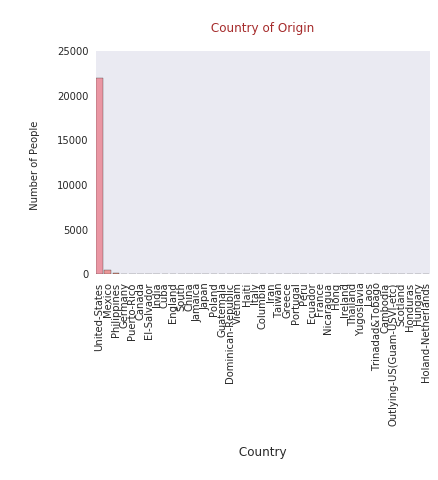

In [15]:
#Bar chart showing number of data for each country
 

label= count_nativecountry_train.index
Number = count_nativecountry_train["NativeCountry"]

# Plotting Style
sns.set(style="dark", color_codes=True)

# Barplot 
sns.barplot(x = label, y = Number)
plt.xticks(rotation=90)


#Plot Labelling
plt.xlabel('\n Country \n', fontsize=12) #Title for X axis
plt.ylabel('\n\n Number of People  \n', fontsize=10)
plt.title('\n Country of Origin \n', color='Brown')
plt.figure(figsize=(2000,1000))
#Display Plot
plt.show() #To display plot

## Conclusion from Plot of Native Country


NaN count in NativeCountry Column is 395 which is very less compared to total data.

Ratio of missing value to total data is $ \alpha= \frac{395}{24490}*100= 1.16 \% $
which is very low and hence we have following possibilities;
<div class="alert alert-block alert-info">
 - **Remove Rows Containing NaN from NativeCountry Column**
 
 - **Replace NaN with 'United-States' since Data is Skewed towards 'United-States'**
 
 - **Use an alogrithm to predict missing value**
 

Using an algorithm to predict the missing values in 'NativeCountry' column will not be a nice idea because as data is skewed the alogrithm has very less data points to learn about other classes (Countries) hence the prediction outcome will not be correct/accurate. 



<div class="alert alert-block alert-success">
> ## My Decision for NaNs in 'NativeCountry' Column :$\to$ Drop
>> ### Why Drop ?

>> An advantage with removing rows with NaN from 'native Country' is that there are rows which contains more than one NaN, hence by dropping NativeCountry's NaN we are simultaneously reducing number of NaNs in other two columns which is desirable. This can be observed from below table


<font color=green> **Observe that the count of NaN for WorkClass has reduced from 1384 to 1366 and for Occupation there is a reduction from 1390 to 1372 **</font>


In [16]:

#Proof for arguement (Justification)
income_train_clean_nativecountry=income_train.dropna(subset=['NativeCountry'])
#Use Subset=['column name'] to change the contents of specific column of the DataFrame.
print(len(income_train_clean_nativecountry))
income_train_clean_nativecountry.isnull().sum()
# Count of NaN in NativeCountry is ZERO after performing the dropna operation the NaN


24026


Age                 0
WorkClass        1366
FinalWeight         0
Education           0
EducationLvl        0
MaritalStatus       0
Occupation       1372
Relationship        0
Race                0
Sex                 0
CapitalGain         0
CapitalLoss         0
HoursPerWeek        0
NativeCountry       0
IncomeBracket       0
dtype: int64

In [89]:
print('The dataset has reduced by',len(income_train)-len(income_train_clean_nativecountry), 'to 24,026' )
#Validating with new len of dataframe after dropping NaNs from NativeCountry. We will use this dataframe from here

The dataset has reduced by 395 to 24,026


## Dealing with the other two columns i.e 'Occupation', and 'WorkClass' containing NaN

In [17]:
count_occupation_train=pd.DataFrame(income_train_clean_nativecountry['Occupation'].value_counts())

print('\n\n Count of NaNs in Occupation column is 1372')
count_occupation_train




 Count of NaNs in Occupation column is 1372


,Occupation
Exec-managerial,3056
Prof-specialty,3021
Craft-repair,3015
Adm-clerical,2807
Sales,2691
Other-service,2389
Machine-op-inspct,1478
Transport-moving,1135
Handlers-cleaners,1051
Tech-support,713


In [18]:
count_workclass_train=pd.DataFrame(income_train_clean_nativecountry['WorkClass'].value_counts())

print('\n\n Count of NaNs in WorkClass column is 1372')
count_workclass_train




 Count of NaNs in WorkClass column is 1372


,WorkClass
Private,16711
Self-emp-not-inc,1880
Local-gov,1555
State-gov,969
Self-emp-inc,825
Federal-gov,703
Without-pay,11
Never-worked,6


/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


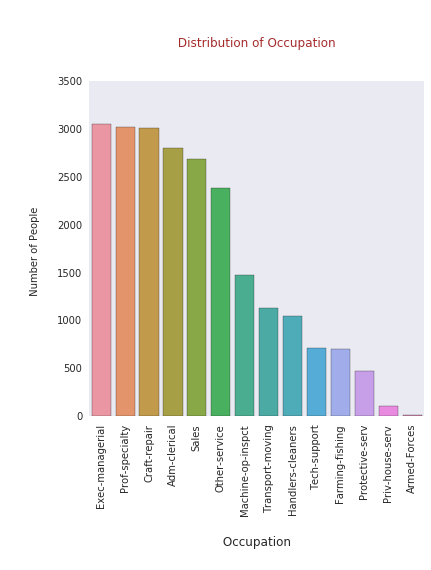

-------------------------------------------------------------------------------------------------------------------------------


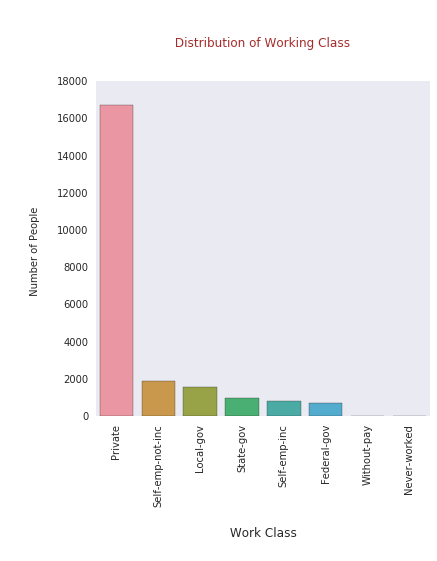

In [12]:
from pylab import rcParams

label= count_occupation_train.index
Number = count_occupation_train["Occupation"]

# Plotting Style
sns.set(style="dark", color_codes=True)
rcParams['figure.figsize']= 6,6
# Barplot 
sns.barplot(x = label, y = Number)
plt.xticks(rotation=90)


#Plot Labelling
plt.xlabel('\n Occupation \n', fontsize=12) #Title for X axis
plt.ylabel('\n\n Number of People  \n', fontsize=10)
plt.title('\n\n Distribution of Occupation \n\n', color='Brown')
plt.figure(figsize=(20000,1000))
#Display Plot
plt.show() #To display plot

print('-------------------------------------------------------------------------------------------------------------------------------')
 

label= count_workclass_train.index
Number = count_workclass_train["WorkClass"]

# Plotting Style
sns.set(style="dark", color_codes=True)
#sns.palplot(sns.color_palette('spectral_r'))
rcParams['figure.figsize'] = 6, 6

# Barplot 
sns.barplot(x = label, y = Number)
plt.xticks(rotation=90)


#Plot Labelling
plt.xlabel('\n Work Class \n', fontsize=12) #Title for X axis
plt.ylabel('\n\n Number of People  \n', fontsize=10)
plt.title('\n\n Distribution of Working Class \n\n', color='Brown')
plt.figure(figsize=(20000,1000))
#Display Plot
plt.show() #To display plot

<dl>
  <dt> Statistics </dt>
  <dd> Which feature is most repeated in each columns. We can know this easilt from the bar plot for columns under consideration however we can also use  `DataFrame.mode()` command in pandas to know the statistics</dd>

 

In [19]:
#Finding the mode to find most frequent value in column. We will replace all NaN values in 'Occupation' and 'WorkClass' with its mode. 
# Example "workclass' has private which is most frequent hence we will replace NaN with private.

income_train_clean=income_train_clean_nativecountry[:][:]
income_train_clean.mode()

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
0,36,Private,125892,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<50K


### Replacing NaN
<div class="alert alert-block alert-info">
The outout of code shows that all NaN values are replaced, and there are no NaN values in any of the columns of the `income_train` data set. For WorkClass and occupation most repeated value is Private and Exec-managerial respectively.

**How can we deal with these NaNs ?**
 1. Drop all NaN containing rows
 2. Replace with mode of respective column 
 3. Use clustering algorithm to find the missing values
 4. Guesstimate


<div class="alert alert-block alert-success">
> ## My Decision for NaNs in 'Occupation' and 'WorkClass' Column :$\to$ Replace with Mode of respective column
>> ### Why Mode ?
>> I replaced all NaN in each column with mode value. If I were to drop all rows containing NaN I am at risk of losing data. Assuming I drop all NaN rows i would lose 1767 row elements from my training data (combined with nativecountry). 
$ \ DataLost_\bydropping= \frac{1767}{24421}*100= 7.23 \% $. which to me is not accecptable considering the fact that I can swap them with mode value. Doing so will keep my lost data count limited to $ \alpha = 1.16 \% $, which is acceptable.

>> I didnt not explore the idea of using clustering algorithm to predict the missing value is because the data is very skewed. Hence the results of algorithm will not be satisfactory.

In [20]:
income_train_clean=pd.DataFrame(income_train_clean_nativecountry[:][:])

income_train_clean['WorkClass'].fillna('Private', inplace=True)
income_train_clean['Occupation'].fillna('Exec-managerial', inplace=True)


cleanup_nums = {"IncomeBracket":     {"<50K": 50, ">100K": 100, "50-100K": 75}}
income_train_clean.replace(cleanup_nums, inplace=True)

print(income_train_clean.isnull().sum()) #NaN values are zero
print(len(income_train_clean))
income_train_clean

Age              0
WorkClass        0
FinalWeight      0
Education        0
EducationLvl     0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
Sex              0
CapitalGain      0
CapitalLoss      0
HoursPerWeek     0
NativeCountry    0
IncomeBracket    0
dtype: int64
24026


,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
0,42,State-gov,179151,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,50
1,28,Private,68021,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,30,United-States,50
2,24,Private,233499,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,75
3,32,Self-emp-not-inc,168782,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,32,United-States,50
4,55,Self-emp-not-inc,105582,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,2228,0,50,United-States,50
5,35,Private,261241,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,0,1741,60,United-States,50
6,51,Private,200576,Bachelors,13,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,50
7,43,Self-emp-inc,175715,HS-grad,9,Never-married,Exec-managerial,Not-in-family,Black,Male,0,0,55,United-States,50
8,29,State-gov,188986,Assoc-voc,11,Never-married,Tech-support,Not-in-family,White,Female,0,1590,64,United-States,50
9,65,Private,137354,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,20,United-States,50



|Column Name    | WorkClass       | Occupation           | NativeCountry  |
    | ------------- |:-------------:| -----:|
|NaN Count    | **0**      | **0** | **0** |
||Dataframe Length 24026| Original Length 24421 |Data Lost in Cleaning = 1.16 %|

Repeating Same for Test Data

In [21]:
income_test_NaN = income_test[income_test.isnull().any(axis=1)]
print('Total rows containing NaN values is ',len(income_test_NaN))
print('Income test data with Nan is \n')
income_test_NaN.head()


Total rows containing NaN values is  904
Income test data with Nan is 



,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
6,34,Private,303187,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>100K
31,48,NaN,136455,Some-college,10,Divorced,NaN,Not-in-family,White,Female,0,0,16,United-States,<50K
58,71,NaN,158437,5th-6th,3,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,Hungary,<50K
67,20,NaN,210029,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,40,United-States,<50K
91,38,Private,22245,Masters,14,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,72,NaN,>100K


In [22]:
#Displaying only NaN rows 

income_test_NaN = income_test[income_test.isnull().any(axis=1)]
print('Total rows containing NaN values is ',len(income_test_NaN))
print('Income Testing data with Nan is')
income_test.head()

Total rows containing NaN values is  904
Income Testing data with Nan is


,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
0,57,Self-emp-not-inc,152030,Some-college,10,Married-civ-spouse,Sales,Wife,White,Female,0,0,25,United-States,50-100K
1,35,Private,341643,Bachelors,13,Never-married,Other-service,Other-relative,White,Male,0,0,50,United-States,<50K
2,26,Private,40915,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,25,United-States,<50K
3,27,Federal-gov,257124,Bachelors,13,Never-married,Transport-moving,Other-relative,White,Male,0,0,35,United-States,<50K
4,21,Private,256278,HS-grad,9,Never-married,Other-service,Other-relative,Other,Female,0,0,35,El-Salvador,<50K


In [23]:
# Knowing which columns have missing data

test_NaN=income_test.isnull().sum()
test_NaN
# Workk Class, Occupation and Native country has the missing values
#now let's see what is the distribution of values of these columns, and analyze their statistics

Age                0
WorkClass        688
FinalWeight        0
Education          0
EducationLvl       0
MaritalStatus      0
Occupation       690
Relationship       0
Race               0
Sex                0
CapitalGain        0
CapitalLoss        0
HoursPerWeek       0
NativeCountry    225
IncomeBracket      0
dtype: int64


|Column Name    | WorkClass       | Occupation           | NativeCountry  |
    | ------------- |:-------------:| -----:|
|NaN Count    | **688**      | **690** | **225** |

In [15]:
count_nativecountry_test=pd.DataFrame(income_test['NativeCountry'].value_counts())
print('\n\n Count of NaNs in NativeCountry column is 395')
count_nativecountry_test.head()



 Count of NaNs in NativeCountry column is 395


,NativeCountry
United-States,11003
Mexico,206
Philippines,68
Germany,59
Canada,51


/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


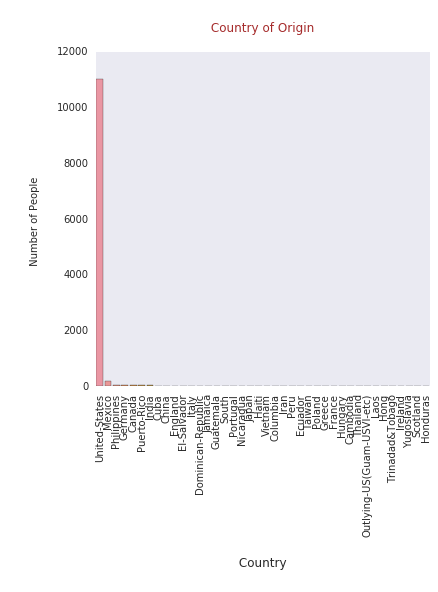

In [20]:
#Bar chart showing number of data for each country
 

label= count_nativecountry_test.index
Number = count_nativecountry_test["NativeCountry"]

# Plotting Style
sns.set(style="dark", color_codes=True)

# Barplot 
sns.barplot(x = label, y = Number)
plt.xticks(rotation=90)


#Plot Labelling
plt.xlabel('\n Country \n', fontsize=12) #Title for X axis
plt.ylabel('\n\n Number of People  \n', fontsize=10)
plt.title('\n Country of Origin \n', color='Brown')
plt.figure(figsize=(1000,500))
#Display Plot
plt.show() #To display plot

In [24]:

#Proof for arguement (Justification)
income_test_clean_nativecountry=income_test.dropna(subset=['NativeCountry'])
#Use Subset=['column name'] to change the contents of specific column of the DataFrame.
print(len(income_test_clean_nativecountry))
income_test_clean_nativecountry.isnull().sum()
# Count of NaN in NativeCountry is ZERO after performing the dropna operation the NaN


11986


Age                0
WorkClass        677
FinalWeight        0
Education          0
EducationLvl       0
MaritalStatus      0
Occupation       679
Relationship       0
Race               0
Sex                0
CapitalGain        0
CapitalLoss        0
HoursPerWeek       0
NativeCountry      0
IncomeBracket      0
dtype: int64

In [25]:
count_occupation_test=pd.DataFrame(income_test_clean_nativecountry['Occupation'].value_counts())

print('\n\n Count of NaNs in Occupation column is 1372')
count_occupation_test

count_workclass_test=pd.DataFrame(income_test_clean_nativecountry['WorkClass'].value_counts())

print('\n\n Count of NaNs in WorkClass column is 1372')
count_workclass_test



 Count of NaNs in Occupation column is 1372


 Count of NaNs in WorkClass column is 1372


,WorkClass
Private,8281
Self-emp-not-inc,965
Local-gov,784
State-gov,476
Self-emp-inc,426
Federal-gov,371
Without-pay,4
Never-worked,2


/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


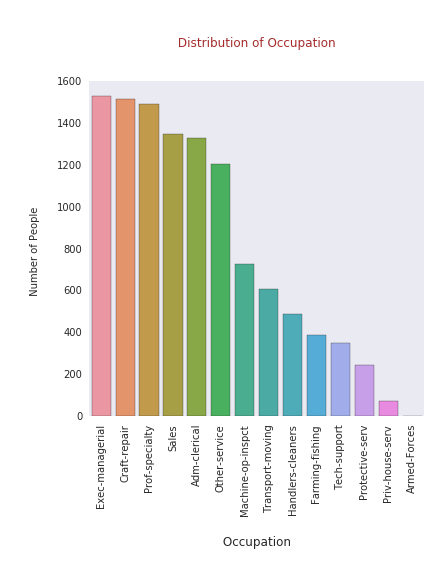

*******************************************************************************************************************************


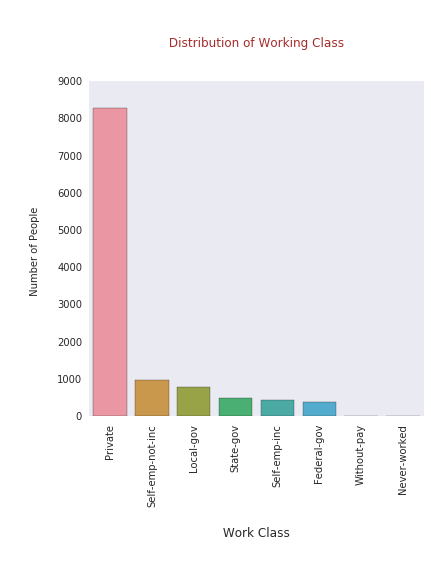

In [23]:
from pylab import rcParams

label= count_occupation_test.index
Number = count_occupation_test["Occupation"]

# Plotting Style
sns.set(style="dark", color_codes=True)
rcParams['figure.figsize']= 6,6
# Barplot 
sns.barplot(x = label, y = Number)
plt.xticks(rotation=90)


#Plot Labelling
plt.xlabel('\n Occupation \n', fontsize=12) #Title for X axis
plt.ylabel('\n\n Number of People  \n', fontsize=10)
plt.title('\n\n Distribution of Occupation \n\n', color='Brown')
plt.figure(figsize=(20000,1000))
#Display Plot
plt.show() #To display plot

print('*******************************************************************************************************************************')

label= count_workclass_test.index
Number = count_workclass_test["WorkClass"]

# Plotting Style
sns.set(style="dark", color_codes=True)
#sns.palplot(sns.color_palette('spectral_r'))
rcParams['figure.figsize'] = 6, 6

# Barplot 
sns.barplot(x = label, y = Number)
plt.xticks(rotation=90)


#Plot Labelling
plt.xlabel('\n Work Class \n', fontsize=12) #Title for X axis
plt.ylabel('\n\n Number of People  \n', fontsize=10)
plt.title('\n\n Distribution of Working Class \n\n', color='Brown')
plt.figure(figsize=(20000,1000))
#Display Plot
plt.show() #To display plot

In [26]:
income_test_clean=income_test_clean_nativecountry[:][:]
income_test_clean.mode().drop(1)

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
0,37.0,Private,99185,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,<50K


In [27]:
income_test_clean=pd.DataFrame(income_test_clean_nativecountry[:][:])

income_test_clean['WorkClass'].fillna('Private', inplace=True)
income_test_clean['Occupation'].fillna('Exec-managerial', inplace=True)
print(income_test_clean.isnull().sum()) #NaN values are zero
print(len(income_test_clean))
len(income_test_clean)

Age              0
WorkClass        0
FinalWeight      0
Education        0
EducationLvl     0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
Sex              0
CapitalGain      0
CapitalLoss      0
HoursPerWeek     0
NativeCountry    0
IncomeBracket    0
dtype: int64
11986


11986

In [28]:
income_test_clean.head()

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
0,57,Self-emp-not-inc,152030,Some-college,10,Married-civ-spouse,Sales,Wife,White,Female,0,0,25,United-States,50-100K
1,35,Private,341643,Bachelors,13,Never-married,Other-service,Other-relative,White,Male,0,0,50,United-States,<50K
2,26,Private,40915,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,25,United-States,<50K
3,27,Federal-gov,257124,Bachelors,13,Never-married,Transport-moving,Other-relative,White,Male,0,0,35,United-States,<50K
4,21,Private,256278,HS-grad,9,Never-married,Other-service,Other-relative,Other,Female,0,0,35,El-Salvador,<50K


#### I have replace the income braket values with numeric 50 100 and 75 representing <50K, 50K-100K, and >100K

In [29]:
cleanup_nums = {"IncomeBracket":     {"<50K": 50, ">100K": 100, "50-100K": 75 }}

income_test_clean.replace(cleanup_nums, inplace=True)
income_test_clean.head()



,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
0,57,Self-emp-not-inc,152030,Some-college,10,Married-civ-spouse,Sales,Wife,White,Female,0,0,25,United-States,75
1,35,Private,341643,Bachelors,13,Never-married,Other-service,Other-relative,White,Male,0,0,50,United-States,50
2,26,Private,40915,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,25,United-States,50
3,27,Federal-gov,257124,Bachelors,13,Never-married,Transport-moving,Other-relative,White,Male,0,0,35,United-States,50
4,21,Private,256278,HS-grad,9,Never-married,Other-service,Other-relative,Other,Female,0,0,35,El-Salvador,50


In [30]:
#Converting Ordinal Education Category 

edu_ord_map = {'Preschool': 1, '1st-4th': 4, '5th-6th': 6, 
              '7th-8th': 8, '9th': 9, '10th': 10, '11th': 11,
               '12th': 12, 'HS-grad': 13, 'Some-college': 14, 
               'Bachelors': 15, 'Masters':16, 'Prof-school':17,
               'Doctorate':18, 'Assoc-acdm':19, 'Assoc-voc':20}

income_train_ord=income_train_clean

income_train_ord['EduLabel'] = income_train_clean['Education'].map(edu_ord_map)
income_train_ord[['Education', 'EduLabel', 'IncomeBracket']].iloc[4:10]

#********************************************************************************************************************************

income_test_ord=income_test_clean

income_test_ord['EduLabel'] = income_test_clean['Education'].map(edu_ord_map)
income_test_ord[['Education', 'EduLabel', 'IncomeBracket']].iloc[4:10]
#income_train_ord.dtype() 

,Education,EduLabel,IncomeBracket
4,HS-grad,13,50
5,HS-grad,13,50
7,Masters,16,50
8,HS-grad,13,50
9,HS-grad,13,50
10,HS-grad,13,75


In [31]:
# Deciding which variables we want for modelling. 

for col_name in income_train_clean.columns:
    if income_train_clean[col_name].dtype == 'object':
        unique_cat= len(income_train_clean[col_name].unique())
        print("feature '{col_name}' has '{unique_cat}' unique categories".format(col_name=col_name, unique_cat=unique_cat))

print('\n\n\n Feature in NativeCountry Columns are \n',income_train_clean['NativeCountry'].value_counts().sort_values(ascending=False).head())

feature 'WorkClass' has '8' unique categories
feature 'Education' has '16' unique categories
feature 'MaritalStatus' has '7' unique categories
feature 'Occupation' has '14' unique categories
feature 'Relationship' has '6' unique categories
feature 'Race' has '5' unique categories
feature 'Sex' has '2' unique categories
feature 'NativeCountry' has '41' unique categories



 Feature in NativeCountry Columns are 
 United-States    21978
Mexico             485
Philippines        146
Germany             96
Puerto-Rico         90
Name: NativeCountry, dtype: int64


#### **As the number of feature US exceeds that of other, we will consider rest of countries into one feature and US into another. This way we are reducing number of features created after encoding/ creating dummies variables**
> If I don't club them together I would have 41 features corresponding to each countries, which are in less number in data and thereby increasing complexity of model

In [32]:
#Creating custom binary code for NativeCountry 


income_train_ord["NativeCountry_Code"] = np.where(income_train_clean["NativeCountry"].str.contains("United-States"), 1,0)

income_train_ord.drop('Education', axis=1, inplace=True)
income_train_ord.drop('NativeCountry', axis=1, inplace=True)

income_train_ord.head()


income_test_ord["NativeCountry_Code"] = np.where(income_test_clean["NativeCountry"].str.contains("United-States"), 1,0)

income_test_ord.drop('Education', axis=1, inplace=True)
income_test_ord.drop('NativeCountry', axis=1, inplace=True)

income_test_ord

,Age,WorkClass,FinalWeight,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,IncomeBracket,EduLabel,NativeCountry_Code
0,57,Self-emp-not-inc,152030,10,Married-civ-spouse,Sales,Wife,White,Female,0,0,25,75,14,1
1,35,Private,341643,13,Never-married,Other-service,Other-relative,White,Male,0,0,50,50,15,1
2,26,Private,40915,13,Never-married,Other-service,Not-in-family,White,Female,0,0,25,50,15,1
3,27,Federal-gov,257124,13,Never-married,Transport-moving,Other-relative,White,Male,0,0,35,50,15,1
4,21,Private,256278,9,Never-married,Other-service,Other-relative,Other,Female,0,0,35,50,13,0
5,28,Private,128055,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,50,13,1
7,26,Private,205109,14,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,50,16,1
8,26,Private,33610,9,Never-married,Transport-moving,Own-child,White,Male,0,0,40,50,13,1
9,35,State-gov,167482,9,Never-married,Protective-serv,Own-child,White,Male,0,1980,40,50,13,1
10,39,Local-gov,166497,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,75,13,1


In [23]:
income_test_ord

,Age,WorkClass,FinalWeight,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,IncomeBracket,EduLabel,NativeCountry_Code
0,57,Self-emp-not-inc,152030,10,Married-civ-spouse,Sales,Wife,White,Female,0,0,25,75,14,1
1,35,Private,341643,13,Never-married,Other-service,Other-relative,White,Male,0,0,50,50,15,1
2,26,Private,40915,13,Never-married,Other-service,Not-in-family,White,Female,0,0,25,50,15,1
3,27,Federal-gov,257124,13,Never-married,Transport-moving,Other-relative,White,Male,0,0,35,50,15,1
4,21,Private,256278,9,Never-married,Other-service,Other-relative,Other,Female,0,0,35,50,13,0
5,28,Private,128055,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,50,13,1
7,26,Private,205109,14,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,50,16,1
8,26,Private,33610,9,Never-married,Transport-moving,Own-child,White,Male,0,0,40,50,13,1
9,35,State-gov,167482,9,Never-married,Protective-serv,Own-child,White,Male,0,1980,40,50,13,1
10,39,Local-gov,166497,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,75,13,1


### I am using LabelEncoder for converting categorical data to numeric for the purpose of data exploration to understand underlying corelation in the data 

In [32]:
from sklearn.preprocessing import LabelEncoder
s=income_train_ord.apply(LabelEncoder().fit_transform)
s.head()


,Age,WorkClass,FinalWeight,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,IncomeBracket,EduLabel,NativeCountry_Code
0,25,6,8444,9,2,4,0,4,1,0,0,39,0,9,1
1,11,3,1838,9,4,7,1,4,0,0,0,29,0,9,1
2,7,3,12331,9,2,13,0,4,1,0,0,39,1,9,1
3,15,5,7499,4,2,2,0,4,1,0,0,31,0,4,1
4,38,5,3454,13,2,11,0,4,1,27,0,49,0,11,1


In [33]:
df1_corr = s.corr()
df1_corr

,Age,WorkClass,FinalWeight,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,IncomeBracket,EduLabel,NativeCountry_Code
Age,1.000000,0.044074,-0.087502,0.041272,-0.256931,-0.000214,-0.261861,0.027846,0.084972,0.122386,0.065234,0.069080,0.215134,0.004504,0.011466
WorkClass,0.044074,1.000000,-0.034339,0.005465,-0.019020,0.007593,-0.059004,0.055731,0.065458,0.010237,0.008480,0.038045,-0.005034,0.000978,-0.001345
FinalWeight,-0.087502,-0.034339,1.000000,-0.039552,0.032110,-0.005640,0.012015,-0.013284,0.032843,-0.011141,0.004362,-0.015658,-0.006474,-0.039205,-0.081800
EducationLvl,0.041272,0.005465,-0.039552,1.000000,-0.072015,0.102219,-0.096438,0.027531,0.013217,0.161902,0.085067,0.146303,0.312747,0.821056,0.126678
MaritalStatus,-0.256931,-0.019020,0.032110,-0.072015,1.000000,-0.004782,0.187521,-0.063954,-0.128331,-0.073545,-0.032734,-0.194008,-0.183311,-0.068475,-0.027562
Occupation,-0.000214,0.007593,-0.005640,0.102219,-0.004782,1.000000,-0.067007,0.012209,0.070748,0.027917,0.016361,0.053866,0.062347,0.054001,0.010427
Relationship,-0.261861,-0.059004,0.012015,-0.096438,0.187521,-0.067007,1.000000,-0.124846,-0.583203,-0.097162,-0.061508,-0.249324,-0.240264,-0.050320,-0.016665
Race,0.027846,0.055731,-0.013284,0.027531,-0.063954,0.012209,-0.124846,1.000000,0.089194,0.029162,0.020579,0.043343,0.070986,0.023713,0.212745
Sex,0.084972,0.065458,0.032843,0.013217,-0.128331,0.070748,-0.583203,0.089194,1.000000,0.077179,0.056771,0.228808,0.203553,-0.014940,-0.003427
CapitalGain,0.122386,0.010237,-0.011141,0.161902,-0.073545,0.027917,-0.097162,0.029162,0.077179,1.000000,-0.058837,0.110800,0.316538,0.111866,0.015215


### One hot encoding is used to create dummy variables i.e representing categorical data into numeric.

In [33]:
 
#one hot encoding 
from sklearn.preprocessing import OneHotEncoder 


encoded_train1hot = pd.get_dummies(income_train_ord)

encoded_train1hot.drop('Sex_Female', axis=1, inplace=True)
encoded_train1hot.drop('EducationLvl', axis=1, inplace=True)
#dropping education Lvl as it represents same information as EduLabel

encoded_train1hot.head()




,Age,FinalWeight,CapitalGain,CapitalLoss,HoursPerWeek,IncomeBracket,EduLabel,NativeCountry_Code,WorkClass_Federal-gov,WorkClass_Local-gov,...,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,Sex_Male
0,42,179151,0,0,40,50,14,1,0,0,...,0,0,0,0,0,0,0,0,1,1
1,28,68021,0,0,30,50,14,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,24,233499,0,0,40,75,14,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,32,168782,0,0,32,50,9,1,0,0,...,0,0,0,0,0,0,0,0,1,1
4,55,105582,2228,0,50,50,16,1,0,0,...,0,0,0,0,0,0,0,0,1,1


#### Femal/Male is a binary feature in given dataset (no transgenders/no sex etc values). Hence we can confidently drop one feature from the dataset. 

For example if the value in male column is zero that means the observation under consideration is female and vice versa, thus we are able to extract same information from one column.

In [34]:
encoded_testset1hot = pd.get_dummies(income_test_ord)

encoded_testset1hot.drop('Sex_Female', axis=1, inplace=True)
encoded_testset1hot.drop('EducationLvl', axis=1, inplace=True)
#dropping education Lvl as it represents same information as EduLabel

encoded_testset1hot.head()

,Age,FinalWeight,CapitalGain,CapitalLoss,HoursPerWeek,IncomeBracket,EduLabel,NativeCountry_Code,WorkClass_Federal-gov,WorkClass_Local-gov,...,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,Sex_Male
0,57,152030,0,0,25,75,14,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,35,341643,0,0,50,50,15,1,0,0,...,1,0,0,0,0,0,0,0,1,1
2,26,40915,0,0,25,50,15,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,27,257124,0,0,35,50,15,1,1,0,...,1,0,0,0,0,0,0,0,1,1
4,21,256278,0,0,35,50,13,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [26]:
encoded_train1hot.head()

,Age,FinalWeight,CapitalGain,CapitalLoss,HoursPerWeek,IncomeBracket,EduLabel,NativeCountry_Code,WorkClass_Federal-gov,WorkClass_Local-gov,...,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,Sex_Male
0,42,179151,0,0,40,50,14,1,0,0,...,0,0,0,0,0,0,0,0,1,1
1,28,68021,0,0,30,50,14,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,24,233499,0,0,40,75,14,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,32,168782,0,0,32,50,9,1,0,0,...,0,0,0,0,0,0,0,0,1,1
4,55,105582,2228,0,50,50,16,1,0,0,...,0,0,0,0,0,0,0,0,1,1


Since all NaN values are either removed or replaced with appropriate value, our dataset is ready for further analysis.
This marks end of ** Data Cleaning **

# 2. Exploratory Data Analysis 
![alt text](https://cdn-images-1.medium.com/max/400/1*hFJ-LI7IXcWpxSLtaC0dfg.png)


## Using seaborn and ** for Data Visualization

>> ### 1. Insight on 'Target' value counts

50     18138
75      3926
100     1962
Name: IncomeBracket, dtype: int64


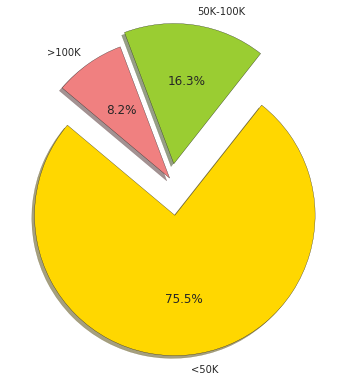

In [37]:
print(income_train_clean['IncomeBracket'].value_counts().sort_values(ascending=False).head())

#import matplotlib.pyplot as plt
 
# Data to plot
labels = '<50K', '50K-100K', ">100K"
sizes = [18138, 3926, 1962]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.25, 0.12, 0.02 )  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

(array([  40.,   50.,   60.,   70.,   80.,   90.,  100.,  110.]),
 <a list of 8 Text xticklabel objects>)

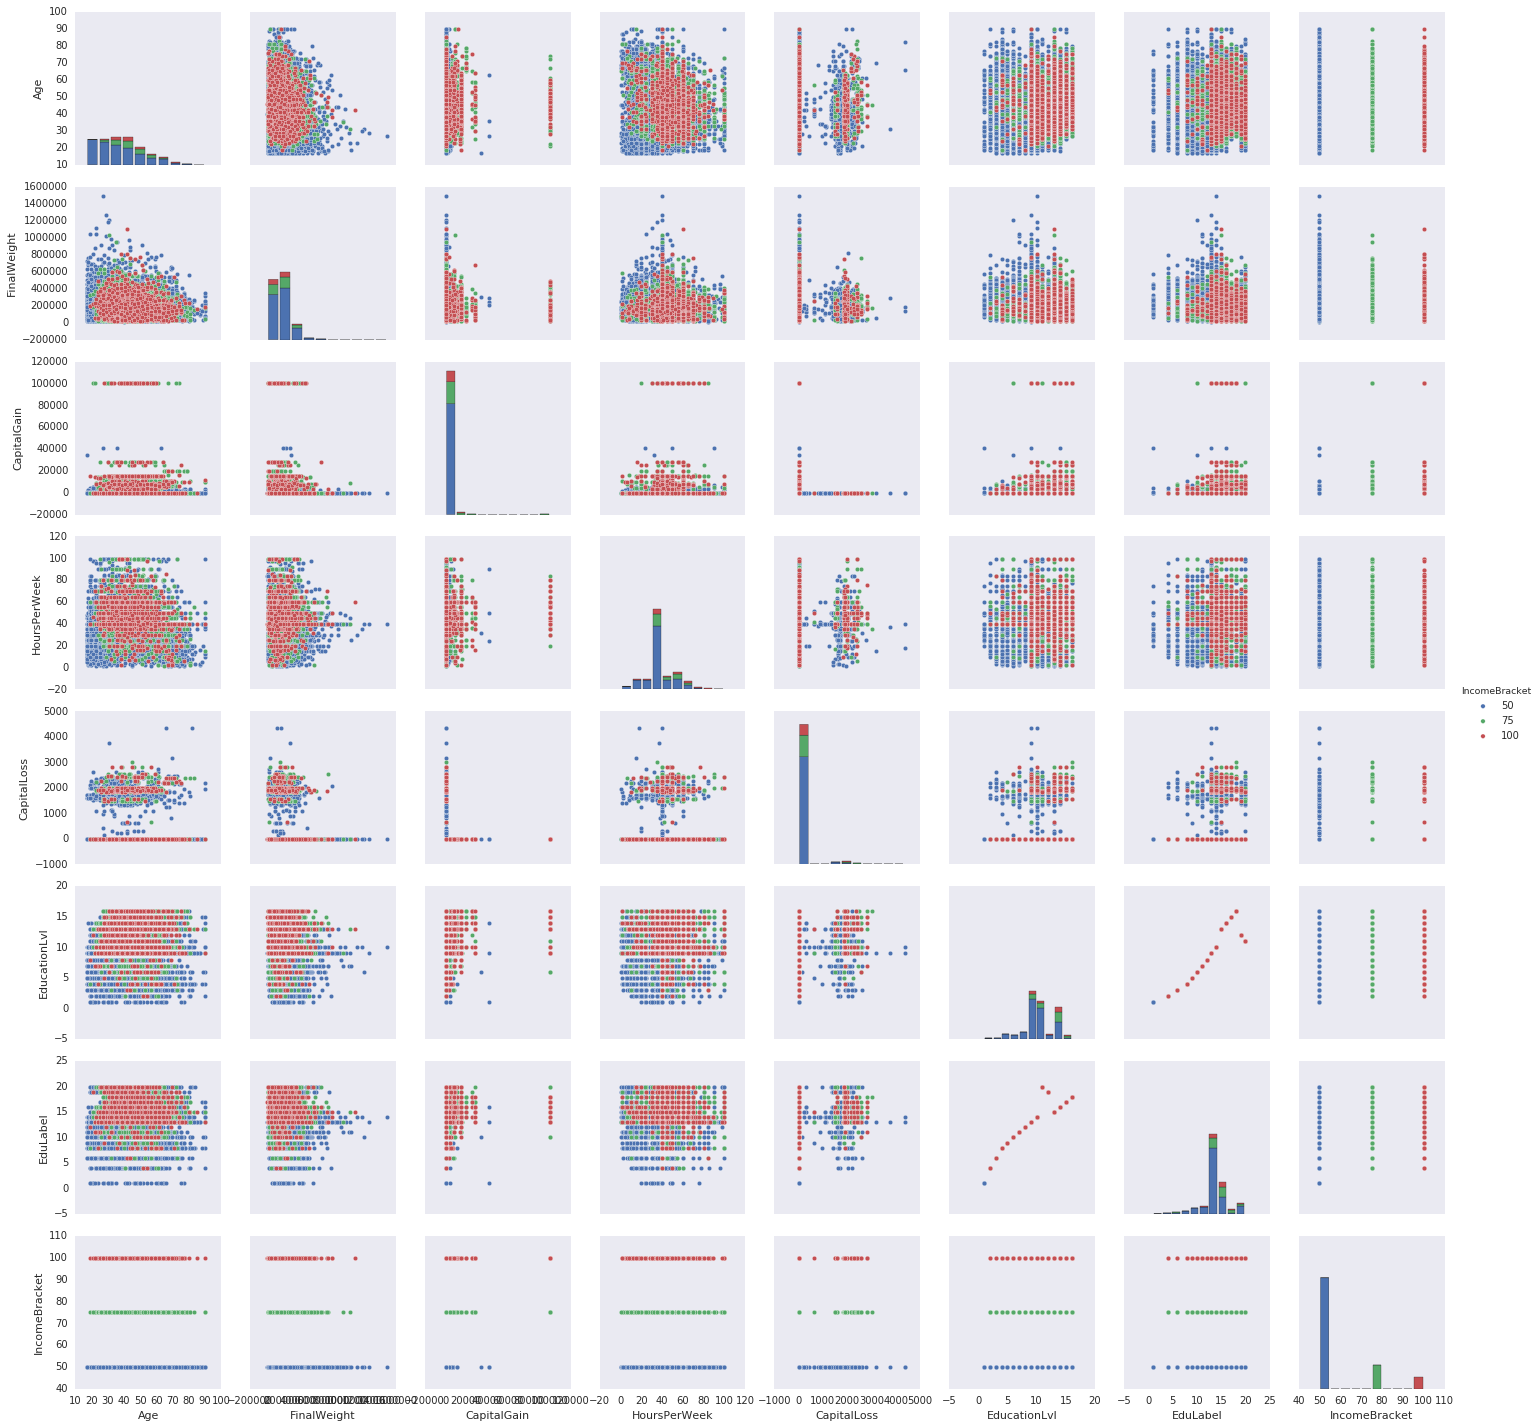

In [38]:
income_train_pairplot=income_train_ord[['Age', 'FinalWeight','Occupation', 'CapitalGain','HoursPerWeek','CapitalLoss','EducationLvl','EduLabel','IncomeBracket']]
sns.pairplot(income_train_pairplot, hue='IncomeBracket', size=2.5);
plt.xticks(rotation=45)

## Inferences based on Pairplot

Pairplot is made when you only want to visualize the relationship between two variables, where the variables can be continous, categorical (product type or  for example) or booleans (yes/no - 1/0). Furthermore, pairplot is usually a grid of plots for each variable in the dataset. Hence once can quickly see how all the variables are related. This can help to infere which variables are useful, which have skewed distribution etc.

 * EducationLvl and Education Label are linear dependent, they are positively co related and we can replace one of the columns (Feature selection)
 * CapitalGain and CapitalLoss values are highly scattered.
 *  On the hours of work per week attribute, there is a great amount of outliers, with some unrealistic values, namely with amounts close to the 100 hours or less than 10 in  individuals with a defined occupation.
 * The influence of age, hours of work per week and educational level on the amount gained by an individual. Higher age, nore work hours and higher education level point towards high income bracket
 * CapitalGain and CapitalLoss are mutually orthogonal
 * Average working hours is approximately 40 hrs
 * 

In [39]:
"""g = sns.PairGrid(income_train_ord, vars=['Age', 'FinalWeight', 'EducationLvl', 'CapitalGain', 'CapitalLoss','HoursPerWeek'],
                 hue='IncomeBracket', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();"""

"g = sns.PairGrid(income_train_ord, vars=['Age', 'FinalWeight', 'EducationLvl', 'CapitalGain', 'CapitalLoss','HoursPerWeek'],\n                 hue='IncomeBracket', palette='RdBu_r')\ng.map(plt.scatter, alpha=0.8)\ng.add_legend();"

,Age,FinalWeight,EducationLvl,CapitalGain,CapitalLoss,HoursPerWeek,IncomeBracket,EduLabel,NativeCountry_Code
count,24026.000000,2.402600e+04,24026.000000,24026.000000,24026.000000,24026.000000,24026.000000,24026.000000,24026.000000
mean,38.637851,1.908811e+05,10.089403,1064.404895,90.743486,40.487222,58.168234,13.872763,0.914759
std,13.682245,1.068111e+05,2.569929,7314.049185,410.411653,12.373256,15.478136,2.595778,0.279246
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,50.000000,1.000000,0.000000
25%,28.000000,1.179630e+05,9.000000,0.000000,0.000000,40.000000,50.000000,13.000000,1.000000
50%,37.000000,1.784710e+05,10.000000,0.000000,0.000000,40.000000,50.000000,14.000000,1.000000
75%,48.000000,2.396628e+05,12.000000,0.000000,0.000000,45.000000,50.000000,15.000000,1.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,100.000000,20.000000,1.000000


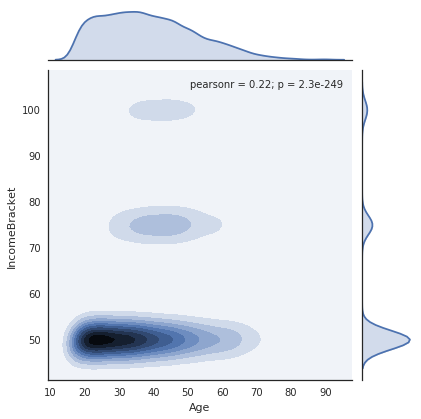

In [40]:
with sns.axes_style('white'):
    sns.jointplot(income_train_clean['Age'], income_train_clean['IncomeBracket'], income_train_clean, kind='kde')
    
income_train_clean.describe()

Majority of data are in lower income group. The mean age is 38 years. The portion of population earning below 50K is highest, while those earning above 100K is less. Older people tend to make more money on average than young ones.

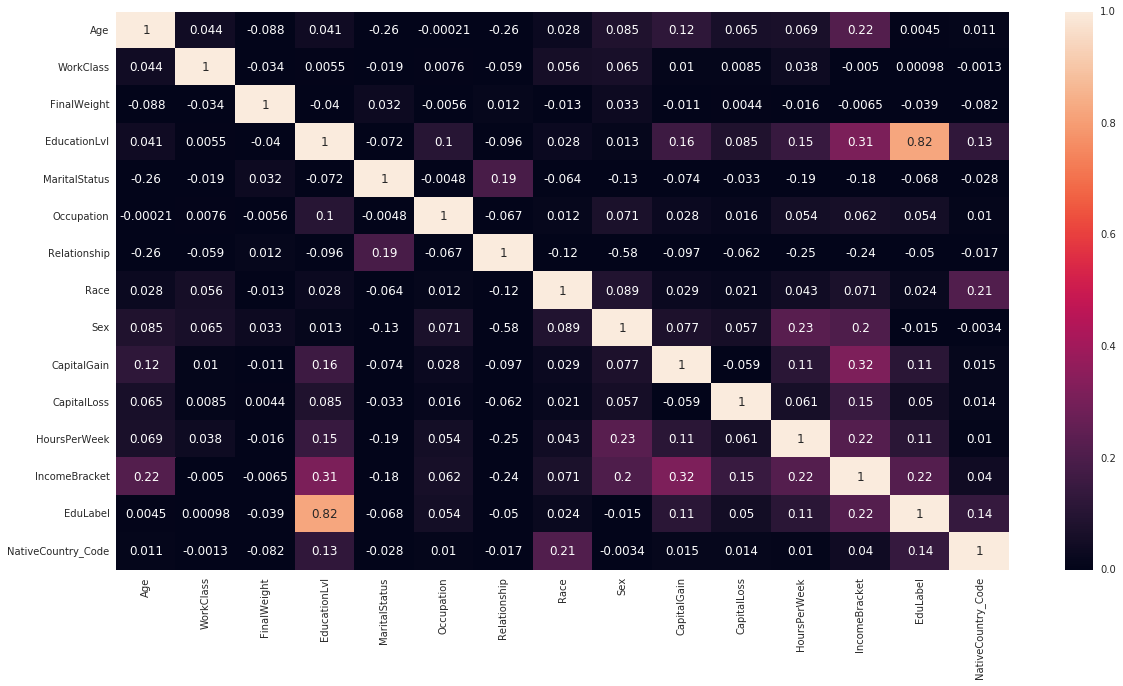

In [41]:
plt.figure(figsize=(20,10))
sns.heatmap(df1_corr, annot = True, vmin =0, vmax=1)
plt.show()

Education level and Education label has high co relation and hence we can represent them as a single feature. Refer to following code where education feature is reduced to single column


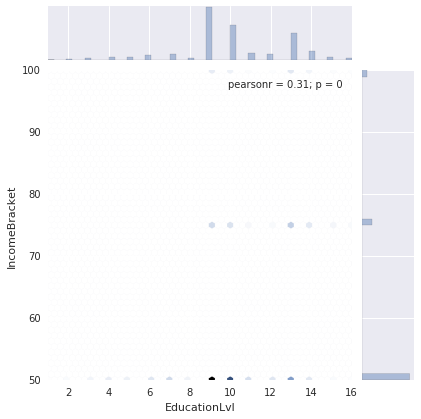

In [42]:
with sns.axes_style('darkgrid'):
    sns.jointplot(income_train_clean['EducationLvl'], income_train_clean['IncomeBracket'], income_train_clean, kind='hex')

In [43]:
#Analysing the workclass column for missing data

count_workclass_train=pd.DataFrame(income_train['WorkClass'].value_counts())
count_workclass_train


,WorkClass
Private,17002
Self-emp-not-inc,1910
Local-gov,1574
State-gov,978
Self-emp-inc,844
Federal-gov,712
Without-pay,11
Never-worked,6


# Feature Selection and Feature Engineering


>> **1. Data Cleaning**
>> 
 **2. Exploratory Data Analysis**
> 
 **3. Features Selection**
>> 
 **4. Model Implementation**
>> 
 **5. Model Tuning**
>> 
 **6. Testing and Discussion**

 1. Interactions amongst features
 * Simple two way interaction can be represented by :
     * $ C= A * B $, where C is the interaction between A and B
     
Example :
The set of items is $ I={milk,bread,butter,beer,diapers} $ and in the table is shown a small database containing the items, where, in each entry, the value 1 means the presence of the item in the corresponding transaction, and the value 0 represents the absence of an item in that transaction

|transaction ID|	milk	|bread	|butter|	beer|	diapers|
| ----------|:-------------:| -----:|-----:|-----:|-----:|-----:|
|1|	1|	1|	0|	0|	0|
|2|	0|	0|	1|	0|	0|
|3|	0|	0|	0|	1|	1|
|4|	1|	1|	1|	0|	0|
|5|	0|	1|	0|  0|	0|

An example rule for the supermarket could be **{butter,bread}** :$\to$ **{milk}** meaning that if butter and bread are bought, customers also buy milk

 * Interactions among dummy variables ($Relationship-Other-relative*Relationship-Own-child = 0$) from same feature is always zero
 * By increasing dimensionality we increase the information available to the model but at same time we are trading off computational ease and may potentially cause overfitting to training data

In [72]:
encoded_train1hot.head()

,Age,FinalWeight,CapitalGain,CapitalLoss,HoursPerWeek,IncomeBracket,EduLabel,NativeCountry_Code,WorkClass_Federal-gov,WorkClass_Local-gov,...,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,Sex_Male
0,42,179151,0,0,40,50,14,1,0,0,...,0,0,0,0,0,0,0,0,1,1
1,28,68021,0,0,30,50,14,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,24,233499,0,0,40,75,14,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,32,168782,0,0,32,50,9,1,0,0,...,0,0,0,0,0,0,0,0,1,1
4,55,105582,2228,0,50,50,16,1,0,0,...,0,0,0,0,0,0,0,0,1,1


In [36]:
Y_= encoded_testset1hot.IncomeBracket
Y_.head()

0    75
1    50
2    50
3    50
4    50
Name: IncomeBracket, dtype: int64

In [37]:
X=encoded_train1hot.drop('IncomeBracket', 1)
X["new_feature"]=X["CapitalGain"]-X["CapitalLoss"]
del X["CapitalGain"]
del X["CapitalLoss"]

In [29]:
X.head()

,Age,FinalWeight,HoursPerWeek,EduLabel,NativeCountry_Code,WorkClass_Federal-gov,WorkClass_Local-gov,WorkClass_Never-worked,WorkClass_Private,WorkClass_Self-emp-inc,...,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,Sex_Male,new_feature
0,42,179151,40,14,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,28,68021,30,14,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,24,233499,40,14,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,32,168782,32,9,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,55,105582,50,16,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2228


In [38]:
Y = encoded_train1hot.IncomeBracket
#X = encoded_train1hot.drop('IncomeBracket', axis=1, inplace=True)

len(Y)

24026

In [39]:
X_=encoded_testset1hot.drop('IncomeBracket', 1)


In [40]:

X_["new_feature"]=X_["CapitalGain"]-X_["CapitalLoss"]
del X_["CapitalGain"]
del X_["CapitalLoss"]



In [41]:
X_.head()



,Age,FinalWeight,HoursPerWeek,EduLabel,NativeCountry_Code,WorkClass_Federal-gov,WorkClass_Local-gov,WorkClass_Never-worked,WorkClass_Private,WorkClass_Self-emp-inc,...,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,Sex_Male,new_feature
0,57,152030,25,14,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,35,341643,50,15,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
2,26,40915,25,15,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,27,257124,35,15,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,21,256278,35,13,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [34]:
Y_.head()

0    75
1    50
2    50
3    50
4    50
Name: IncomeBracket, dtype: int64

# EXPLORING SCIKIT LEARN PACKAGES FOR FEATURE SELECTION

### 1. Feature Creation

Trial with sklearn feature extraction library


In [134]:
""""#Using polynomialfeatures in sklearn.preprocessing to create two-way interactions for all features

from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df):
    #Get features names
    combos =list(combinations(list(df.columns), 2))
    colnames=list(df.columns)+['_'.join(x) for x in combos]
    
    #Find Interactions
    #poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = PolynomialFeatures(interaction_only=True, include_bias=False).fit_transform(df)
    df=pd.DataFrame(df)
    df.columns = colnames
    
    #Remove interactions terms with all 0 values
    noint_indices = [i for i, x in enumerate (list((df == 0).all())) if x]
    df = df.drop(df.columns[noint_indices], axis=1)
    
    return df""""

In [311]:
"""X_interactions=add_interactions(X_)
X_interactions.head()"""


'X_interactions=add_interactions(X_)\nX_interactions.head()'

In [283]:
"""X=add_interactions(X)
X.head()"""

'X=add_interactions(X)\nX.head()'

### 2. Dimenionality Reduction


 * Principal Compoenent Analysis (PCA) is a technique that transforms a dataset of many features into principal compoenents that "summarize" the variance that underlies the data
 * Each principal component is calculated by finding the linear combination of features that maximizes variance, while also ensuring zero corelation with the previously calculated principal components
 
 
 * Use cases for modelling:
 
     * One of the most common dimensionality reduction technique
     * Use if there are too many features or if observation/feature ratio is poor
     * Also, potentially good option if there are a lot of highly corelated variables in your dataset
     * On downside, PCA makes model a lot harder to understand
     


![alt text](https://onlinecourses.science.psu.edu/stat857/sites/onlinecourses.science.psu.edu.stat857/files/lesson05/PCA_plot.gif)

In [284]:
"""from sklearn.decomposition import PCA

pca=PCA(n_components=10)
X_pca=pd.DataFrame(pca.fit_transform(X))
X_pca"""

'from sklearn.decomposition import PCA\n\npca=PCA(n_components=10)\nX_pca=pd.DataFrame(pca.fit_transform(X))\nX_pca'

### 3. Feature Selection

 * Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.

 * Having irrelevant features in the data can decrease the accuracy of many models, especially linear algorithms like linear and logistic regression.

 * Three benefits of performing feature selection before modeling the data are:

 * Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise. Improves Accuracy: Less misleading data means modeling accuracy improves. Reduces Training Time: Less data means that algorithms train faster. It reduces the complexity of a model and makes it easier to interpret. It improves the accuracy of a model if the right subset is chosen.

In [42]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.70, random_state=1)

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Recursive Feature Elimination

In [36]:
!pip install xgboost

    100% |████████████████████████████████| 481kB 755kB/s 
  Running setup.py bdist_wheel for xgboost ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done
  Stored in directory: /home/notebook/.cache/pip/wheels/44/75/71/94198575ab2a2946397287601c0632d196bc56a7ff4b985aba
Successfully built xgboost
You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


**About Recursive Feature Selection** Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [49]:
X.shape



(24026, 47)

**Training data has 47 columns meaning 47 features. It is very much possible that some of the feature may have negilible influence in clasfication. Hence we want some method to shortlist most important features and remove redundant or unnecesary columns**

> **I tried using sklearn.preprocessing feature_extraction and subsequent PCA for dimensionality reduction but i didnt not get desired results hence i dropped that idea and used recursive feature selection for shortlisting important features**

Larger number of feature can cause overfitting and slow computing

In [43]:
# Recursive Feature Elimination

from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
model = XGBClassifier()
# create the RFE model and select 3 attributes
rfe = RFE(model, 30)
selected_features = rfe.fit(X_train, y_train)
indices_selected= selected_features.get_support(indices=True)
colnames_selected=[X_train.columns[i] for i in indices_selected]

X_train_selected=X_train[colnames_selected]
X_test_selected=X_test[colnames_selected]

"""# summarize the selection of the attributes
print("Num Features:", fit.n_features_)
print("Selected Features: %s", fit.support_)
print("Feature Ranking: %s", fit.ranking_)"""

'# summarize the selection of the attributes\nprint("Num Features:", fit.n_features_)\nprint("Selected Features: %s", fit.support_)\nprint("Feature Ranking: %s", fit.ranking_)'

In [44]:
len(X_test_selected)

7208

In [45]:
print(len(X_train_selected))

X_train_selected.head()

16818


,Age,FinalWeight,HoursPerWeek,EduLabel,NativeCountry_Code,WorkClass_Federal-gov,WorkClass_Private,WorkClass_Self-emp-inc,WorkClass_Self-emp-not-inc,MaritalStatus_Married-civ-spouse,...,Occupation_Sales,Relationship_Not-in-family,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Black,Race_Other,Race_White,Sex_Male,new_feature
15625,29,118337,60,13,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
17595,37,82576,36,17,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,14084
19401,48,45612,37,13,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
45,17,19752,25,11,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
15742,40,21189,32,15,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#### `X_train_selected` has 30 features

In [313]:
#Comparing features after encoding with one hot encoding method 
print(income_train_ord.shape)
print(X_train_selected.shape)

(24026, 15)
(16818, 30)


In [287]:
"""#Such a large set of features can cause overfitting and slow computing
#Use feature selection to select the most important features
import sklearn.feature_selection

select=sklearn.feature_selection.SelectKBest(k=20)
selected_features=select.fit(X_train,y_train)
indices_selected= selected_features.get_support(indices=True)
colnames_selected=[X.columns[i] for i in indices_selected]

X_train_selected=X_train[colnames_selected]
X_test_selected=X_test[colnames_selected]"""

In [50]:
X_test_selected.head()

,Age,FinalWeight,HoursPerWeek,EduLabel,NativeCountry_Code,WorkClass_Federal-gov,WorkClass_Private,WorkClass_Self-emp-inc,WorkClass_Self-emp-not-inc,MaritalStatus_Married-civ-spouse,...,Occupation_Sales,Relationship_Not-in-family,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Black,Race_Other,Race_White,Sex_Male,new_feature
23484,50,24185,38,15,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
5086,35,261646,55,13,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
6788,19,209826,15,14,1,0,1,0,0,0,...,1,0,1,0,0,0,0,1,0,0
3779,36,165007,40,13,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
983,54,449257,40,13,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0


In [51]:
"""X_testset = X_[['Age','HoursPerWeek','EduLabel','WorkClass_Private','WorkClass_Self-emp-inc','MaritalStatus_Divorced','MaritalStatus_Married-civ-spouse','MaritalStatus_Never-married','Occupation_Adm-clerical','Occupation_Exec-managerial','Occupation_Other-service','Occupation_Prof-specialty','Relationship_Husband','Relationship_Not-in-family','Relationship_Own-child','Relationship_Unmarried','Relationship_Wife','Race_Black','Sex_Male','new_feature']
"""

columnsTitles = ['Age', 'FinalWeight', 'HoursPerWeek', 'EduLabel', 'NativeCountry_Code',
       'WorkClass_Federal-gov', 'WorkClass_Private', 'WorkClass_Self-emp-inc',
       'WorkClass_Self-emp-not-inc', 'MaritalStatus_Married-civ-spouse',
       'MaritalStatus_Separated', 'Occupation_Adm-clerical',
       'Occupation_Craft-repair', 'Occupation_Exec-managerial',
       'Occupation_Farming-fishing', 'Occupation_Handlers-cleaners',
       'Occupation_Machine-op-inspct', 'Occupation_Other-service',
       'Occupation_Prof-specialty', 'Occupation_Protective-serv',
       'Occupation_Sales', 'Relationship_Not-in-family',
       'Relationship_Own-child', 'Relationship_Unmarried', 'Relationship_Wife',
       'Race_Black', 'Race_Other', 'Race_White', 'Sex_Male', 'new_feature']
X_testset=X_.reindex(columns=columnsTitles)
X_testset.head()


,Age,FinalWeight,HoursPerWeek,EduLabel,NativeCountry_Code,WorkClass_Federal-gov,WorkClass_Private,WorkClass_Self-emp-inc,WorkClass_Self-emp-not-inc,MaritalStatus_Married-civ-spouse,...,Occupation_Sales,Relationship_Not-in-family,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Black,Race_Other,Race_White,Sex_Male,new_feature
0,57,152030,25,14,1,0,0,0,1,1,...,1,0,0,0,1,0,0,1,0,0
1,35,341643,50,15,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,26,40915,25,15,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,27,257124,35,15,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,21,256278,35,13,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


#### Thus we have modified the Test data (Income test) as per our extracted features

In [52]:
X_testset.head()

,Age,FinalWeight,HoursPerWeek,EduLabel,NativeCountry_Code,WorkClass_Federal-gov,WorkClass_Private,WorkClass_Self-emp-inc,WorkClass_Self-emp-not-inc,MaritalStatus_Married-civ-spouse,...,Occupation_Sales,Relationship_Not-in-family,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Black,Race_Other,Race_White,Sex_Male,new_feature
0,57,152030,25,14,1,0,0,0,1,1,...,1,0,0,0,1,0,0,1,0,0
1,35,341643,50,15,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,26,40915,25,15,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,27,257124,35,15,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,21,256278,35,13,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [53]:
Y_testset=Y_
Y_testset.head()

0    75
1    50
2    50
3    50
4    50
Name: IncomeBracket, dtype: int64

In [291]:
"""colnames_selected_
"""

'colnames_selected_\n'

In [292]:
colnames_selected

['Age',
 'HoursPerWeek',
 'EduLabel',
 'WorkClass_Private',
 'WorkClass_Self-emp-inc',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married-civ-spouse',
 'MaritalStatus_Never-married',
 'Occupation_Adm-clerical',
 'Occupation_Exec-managerial',
 'Occupation_Other-service',
 'Occupation_Prof-specialty',
 'Relationship_Husband',
 'Relationship_Not-in-family',
 'Relationship_Own-child',
 'Relationship_Unmarried',
 'Relationship_Wife',
 'Race_Black',
 'Sex_Male',
 'new_feature']

In [293]:
len(y_train)

16818

`X_selected` is concatenated dataset. This represents training set. 

while the test test from income_test file will be labeled with an underscore after alphabet. eg X_

In [54]:
print(len(X_test_selected), 'is the lenght of X_test (selected features) data')
print(len(X_train_selected), 'is the lenght of X_train (selected features) data')

X_selected = pd.concat([X_test_selected, X_train_selected])
X_selected
len(X_selected)

7208 is the lenght of X_test (selected features) data
16818 is the lenght of X_train (selected features) data


24026

In [55]:
print(len(X_selected))

len(y_train)

24026


16818

In [56]:
Y_selected=Y
len(Y_selected)

24026

# 4. Model Implementation



>> **1. Data Cleaning**
>> 
 **2. Exploratory Data Analysis**
>> 
 **3. Features Selection**
> 
 **4. Model Implementation**
>> 
 **5. Model Tuning**
>> 
 **6. Testing and Discussion**

### 1. KNN Algorithm

KNN is an non parametric lazy learning algorithm.

Case 1 : k = 1 or Nearest Neighbor Rule
This is the simplest scenario. Let x be the point to be labeled . Find the point closest to x . Let it be y. Now nearest neighbor rule asks to assign the label of y to x. This seems too simplistic and some times even counter intuitive. If you feel that this procedure will result a huge error , you are right – but there is a catch. This reasoning holds only when the number of data points is not very large.

Case 2 : k = K or k-Nearest Neighbor Rule
This is a straightforward extension of 1NN. Basically what we do is that we try to find the k nearest neighbor and do a majority voting. Typically k is odd when the number of classes is 2. Lets say k = 5 and there are 3 instances of C1 and 2 instances of C2. In this case , KNN says that new point has to labeled as C1 as it forms the majority. We follow a similar argument when there are multiple classes.

variable name convention

for training set file
X_train_selected, y_train, X_train, y_test

for test set file
X_testset, Y_testset

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score


neighbor = 28
knn = KNeighborsClassifier(n_neighbors=neighbor,algorithm='kd_tree')

# fitting the model
knn.fit(X_train_selected, y_train)

# predict the response
pred = knn.predict(X_test_selected)

# evaluate accuracy
acc_knn = accuracy_score(y_test, pred)
print('The accuracy of the knn classifier for k = ' + str(neighbor) + ' is ' + str(acc_knn))

The accuracy of the knn classifier for k = 28 is 0.772336293008


<div class="alert alert-block alert-success">

### Test Accuracy using KNN is 77.23 %

In [60]:
def plot_validation_curve(parameter_values, train_scores, validation_scores):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.fill_between(parameter_values, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(parameter_values, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(parameter_values, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(parameter_values, validation_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.ylim(validation_scores_mean.min() - .1, train_scores_mean.max() + .1)
    plt.legend(loc="best")

In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
print(cm)

print(len(cm))


[[5427    7    0]
 [1043  140    2]
 [ 508   81    0]]
3


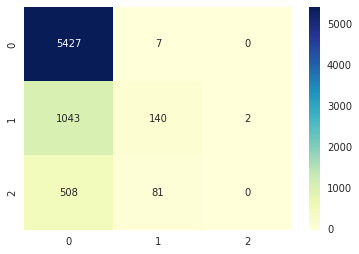

In [74]:
sns.heatmap(cm,annot=True,fmt="d", cmap="YlGnBu")

|`Predicted by Model`| <50K          |   50K-100K    | >100K  |
| -------------| ------------- |:-------------:| -----:|
| **Actual**                    |||                       |  
| **<50K**      | 5427      |   7 | 0|
|** 50K-100K** | 1043      |   140 |2|
| **>100K** | 508     |    81 |0|

In [302]:
from sklearn import metrics
# try K=1 through K=99 and record testing accuracy
k_range = range(1, 50)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_selected, y_train)
    y_pred = knn.predict(X_test_selected)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)
len(scores)

[0.74694783573806878, 0.78801331853496115, 0.77344617092119872, 0.78468368479467254, 0.785377358490566, 0.79120421753607106, 0.79411764705882348, 0.79522752497225302, 0.79605993340732517, 0.79966703662597116, 0.79814095449500555, 0.80036071032186462, 0.80271920088790238, 0.80410654827968919, 0.80230299667036631, 0.80299667036625966, 0.8007769145394007, 0.802441731409545, 0.80202552719200892, 0.80258046614872369, 0.80438401775804658, 0.80438401775804658, 0.80258046614872369, 0.80369034406215312, 0.80299667036625966, 0.80382907880133181, 0.80188679245283023, 0.802441731409545, 0.80285793562708108, 0.80341287458379573, 0.80230299667036631, 0.80285793562708108, 0.80160932297447285, 0.80382907880133181, 0.80285793562708108, 0.80091564927857939, 0.80174805771365154, 0.80216426193118762, 0.80119311875693677, 0.80119311875693677, 0.80230299667036631, 0.80160932297447285, 0.80133185349611546, 0.80119311875693677, 0.80105438401775808, 0.80133185349611546, 0.80105438401775808, 0.80063817980022201

49

49

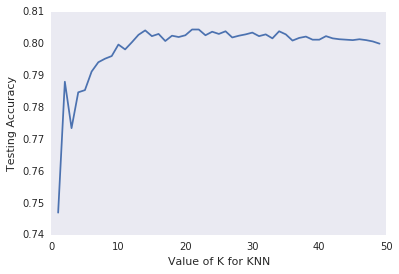

In [62]:
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline
k_range= range(1,50)
scores= [0.74694783573806878, 0.78801331853496115, 0.77344617092119872, 0.78468368479467254, 0.785377358490566, 0.79120421753607106, 0.79411764705882348, 0.79522752497225302, 0.79605993340732517, 0.79966703662597116, 0.79814095449500555, 0.80036071032186462, 0.80271920088790238, 0.80410654827968919, 0.80230299667036631, 0.80299667036625966, 0.8007769145394007, 0.802441731409545, 0.80202552719200892, 0.80258046614872369, 0.80438401775804658, 0.80438401775804658, 0.80258046614872369, 0.80369034406215312, 0.80299667036625966, 0.80382907880133181, 0.80188679245283023, 0.802441731409545, 0.80285793562708108, 0.80341287458379573, 0.80230299667036631, 0.80285793562708108, 0.80160932297447285, 0.80382907880133181, 0.80285793562708108, 0.80091564927857939, 0.80174805771365154, 0.80216426193118762, 0.80119311875693677, 0.80119311875693677, 0.80230299667036631, 0.80160932297447285, 0.80133185349611546, 0.80119311875693677, 0.80105438401775808, 0.80133185349611546, 0.80105438401775808, 0.80063817980022201, 0.79994450610432855]
x=np.array(k_range)
y=np.array(scores)
# plot the relationship between K and testing accuracy
#plt.plot(x, y)
plt.plot(x,y)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')



49

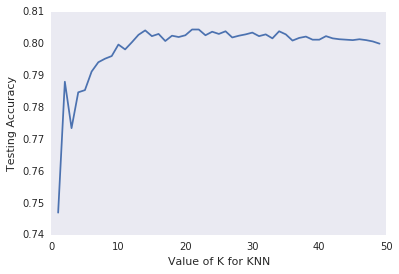

In [63]:

import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline
x=np.array(k_range)
y=np.array(scores)
# plot the relationship between K and testing accuracy
#plt.plot(x, y)
plt.plot(x,y)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
len(y)




The optimal number of neighbors is 24.


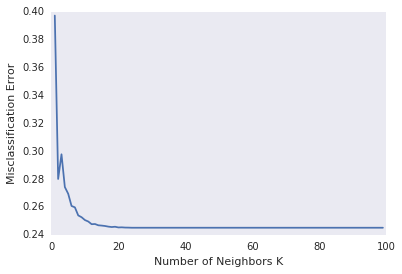

In [65]:
neighbors = range(1,100)
from sklearn.cross_validation import cross_val_score

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
#for k in neighbors:
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_selected, Y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

<div class="alert alert-block alert-success">

### Optimal value of K for which Misclassification Error (MSE) minimizes is 24

In [272]:
from sklearn.learning_curve import validation_curve
degree = np.arange(1,20)
train_score, val_score = validation_curve(knn, X=X_selected, y=Y, 
                                          scoring='accuracy', cv=10)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

TypeError: validation_curve() missing 2 required positional arguments: 'param_name' and 'param_range'

#### Cross Valildation for KNN Algorithm

In [71]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(knn, X_selected, Y, cv=10, scoring='accuracy')
print('The mean accuracy of the knn classifier with cross-validation for k = ' + str(neighbor) + ' is ' + str(scores.mean()))

print("Cross validation accuracies are: {}".format(scores))
print('The variance cross validation score is : ', scores.var())

The mean accuracy of the knn classifier with cross-validation for k = 28 is 0.754932237401
Cross validation accuracies are: [ 0.75457571  0.75457571  0.75488972  0.75488972  0.75488972  0.75488972
  0.755204    0.755204    0.75510204  0.75510204]
The variance cross validation score is :  4.66830748236e-08


## 2. Logistics Regression

LogReg accuracy is: 0.75
Accuracy is:  75.0 %


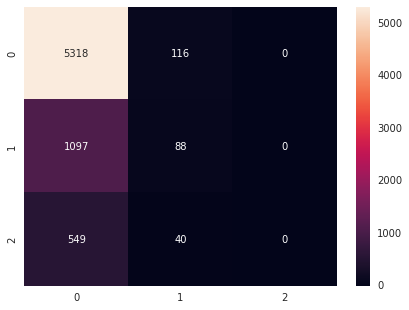

In [166]:
# import
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# instantiate
logreg = LogisticRegression()

# fit
logreg.fit(X_train_selected, y_train)

# predict
y_pred = logreg.predict(X_test_selected)

print('LogReg accuracy is: %s' % metrics.accuracy_score(y_test, y_pred))

ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',round((ac*100),3), "%")
plt.figure(figsize=(7,5))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d", cmap="YlGnBu')

In [227]:
from sklearn.linear_model import LogisticRegression
classifier4 = LogisticRegression(C= 0.2, solver= 'newton-cg', random_state = 0)
classifier4.fit(X_train_selected, y_train)

/usr/local/lib/python3.5/dist-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.5/dist-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [228]:
y_pred = classifier4.predict(X_test_selected)


 The accuracy of the model in percentage is: 75.7352941176


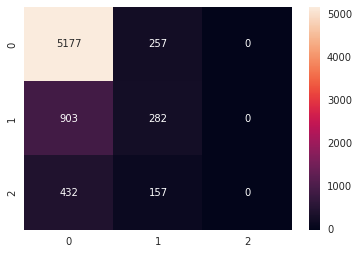

In [229]:
# Confusion matrix for the accuracy

from sklearn.metrics import confusion_matrix, accuracy_score
cm4 = confusion_matrix(y_test, y_pred)
accuracy4 = accuracy_score(y_test, y_pred)
print("\n The accuracy of the model in percentage is:", accuracy4*100)
sns.heatmap(cm4,annot=True,fmt="d")


In [270]:
from sklearn.cross_validation import cross_val_score
scorelr = cross_val_score(classifier4, X_selected, Y, cv=10, scoring='accuracy')
print('The mean accuracy of the Random Forest with cross-validation is ' + str(scorelr.mean()))

print("Cross validation accuracies are: {}".format(scorelr))

/usr/local/lib/python3.5/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.5/dist-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.5/dist-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.5/dist-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not 

The mean accuracy of the Random Forest with cross-validation is 0.754932237401
Cross validation accuracies are: [ 0.75457571  0.75457571  0.75488972  0.75488972  0.75488972  0.75488972
  0.755204    0.755204    0.75510204  0.75510204]


### 3. Random Forest

In [201]:
# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

classifierRF = RandomForestClassifier(random_state=0)

classifierRF.fit(X_train_selected, y_train)

pred=classifierRF.predict(X_test_selected)
print('\n Predicted Class ',pred)

cmrf = confusion_matrix(y_test, pred)
print('\n The confusion matrix for Random Forest Classifier is \n', cmrf)
#print(len(cmrf))
accuracy_randomforest=round(accuracy_score(y_test,pred)*100, 2)
print("\n Accuracy of the trained Model is", accuracy_randomforest, '%')


 Predicted Class  [ 75 100  50 ...,  50  50  50]

 The confusion matrix for Random Forest Classifier is 
 [[4902  384  148]
 [ 615  437  133]
 [ 310  224   55]]

 Accuracy of the trained Model is 74.83 %


####  * Random Forest Cross Validation Scores

In [269]:
from sklearn.cross_validation import cross_val_score
scores_rf = cross_val_score(classifierRF, X_selected, Y, cv=10, scoring='accuracy')
print('The mean accuracy of the Random Forest with cross-validation is ' + str(scores_rf.mean()))

print("Cross validation accuracies are: {}".format(scores_rf))

The mean accuracy of the Random Forest with cross-validation is 0.705110764682
Cross validation accuracies are: [ 0.71006656  0.70424293  0.7037037   0.71036205  0.69413233  0.71036205
  0.70399667  0.70649459  0.70345689  0.70428988]


### 4. Naive Bayes


Ruled out as accuracy is below 70 %

In [175]:
from sklearn.naive_bayes import GaussianNB
classifiernb = GaussianNB()
classifiernb.fit(X_train_selected, y_train)

# Predicting the Test set results
y_prednb = classifiernb.predict(X_test_selected)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cmnb = confusion_matrix(y_test, y_prednb)

print('\n The confusion matrix for Naive Bayes Classifier is \n', cmnb)
#print(len(cmrf))
accuracy_naivebayes=round(accuracy_score(y_test,y_prednb)*100, 2)
print("\n Accuracy of the trained Model is", accuracy_naivebayes,  '%')
len(y_prednb)


 The confusion matrix for Naive Bayes Classifier is 
 [[3888 1542    4]
 [ 282  903    0]
 [ 139  449    1]]

 Accuracy of the trained Model is 66.48 %


7208

In [327]:
prob_pos_clf = classifiernb.predict_proba(X_test_selected)[:, 1]
prob_pos_clf

array([  6.61437040e-01,   6.95424446e-01,   1.90873952e-07, ...,
         1.48362928e-05,   5.01104411e-06,   1.39878739e-06])

In [355]:
#Create the prediction file by concatenation of the original data and predictions
#Reshaping needed to perform the concatenation
pred_clf_df = pd.DataFrame(y_prednb.reshape(7208,1))
#Column renaming to indicate the predictions
pred_clf_df.rename(columns={0:'Prediction'}, inplace=True)

#reshaping the test dataset
X_test_selected_df = pd.DataFrame(X_test_selected.values.reshape(7208,20))

#concatenating the two pandas dataframes over the columns to create a prediction dataset
pred_outcome = pd.concat([X_test_selected_df, pred_clf_df], axis=1, join_axes=[X_test_selected_df.index])
pred_outcome.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,Prediction
0,1.0,0.0,1.0,1900.0,750.0,50.0,50.0,24185.0,24185.0,38.0,...,15.0,15.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,75
1,1.0,0.0,1.0,1925.0,455.0,35.0,35.0,261646.0,261646.0,55.0,...,13.0,13.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,75
2,0.0,1.0,0.0,285.0,266.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50
3,0.0,1.0,0.0,1440.0,468.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50
4,1.0,0.0,1.0,2160.0,702.0,54.0,54.0,449257.0,449257.0,40.0,...,13.0,13.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,75


In [354]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

kfold = model_selection.KFold(n_splits=10, random_state=1)

#calling the cross validation function
cv_results = model_selection.cross_val_score(GaussianNB(),  X_selected, Y , cv=kfold, scoring='accuracy')

#displaying the mean and standard deviation of the prediction
msg = "%s: %f (%f)" % ('NB accuracy', cv_results.mean(), cv_results.std())
print('Mean accuracy and standard deviation of 10 fold Cross validation is',msg,' respectively')

Mean accuracy and standard deviation of 10 fold Cross validation is NB accuracy: 0.753600 (0.008800)  respectively


### 5. XGBoost Algorithm

XGBoost is short for “Extreme Gradient Boosting”, where the term “Gradient Boosting” is proposed in the paper Greedy Function Approximation: A Gradient Boosting Machine, by Friedman. XGBoost is based on this original model. This is a tutorial on gradient boosted trees, and most of the content is based on these slides by the author of xgboost.

The GBM (boosted trees) has been around for really a while, and there are a lot of materials on the topic. This tutorial tries to explain boosted trees in a self-contained and principled way using the elements of supervised learning. We think this explanation is cleaner, more formal, and motivates the variant used in xgboost

![alt text](https://cdn-images-1.medium.com/max/800/0*00BrbBeDrFOjocpK.)


In [237]:
!pip install xgboost

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [75]:
# Fitting XGBoost to the training set
from xgboost import XGBClassifier
classifier = XGBClassifier(n_jobs = -1)
classifier.fit(X_train_selected, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [76]:
# Predicting the Test Set results
y_pred = classifier.predict(X_test_selected)

In [77]:
# Confusion matrix for the accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("\n The Confusion Matrix is:", cm)
print("\n The accuracy of the model in percentage is:", accuracy*100)


 The Confusion Matrix is: [[5260  174    0]
 [ 596  585    4]
 [ 277  306    6]]

 The accuracy of the model in percentage is: 81.1736958935


In [78]:
X_xgb = X_selected.as_matrix()
Y_xgb = Y.as_matrix()

#### Cross Validation for XGBOOST

In [79]:
from sklearn.cross_validation import cross_val_score
scores_xgb = cross_val_score(classifier, X_selected, Y, cv=10, scoring='accuracy')
print('The mean accuracy of the knn classifier with cross-validation is ' + str(scores_xgb.mean()))

print("Cross validation accuracies are: {}".format(scores_xgb))

The mean accuracy of the knn classifier with cross-validation is 0.754890622752
Cross validation accuracies are: [ 0.75457571  0.75457571  0.75488972  0.75488972  0.75447357  0.75488972
  0.755204    0.755204    0.75510204  0.75510204]


<div class="alert alert-block alert-success">

**Thus we can see that XGBoost has the highest test accuracy of 81.17 % and cross validation accuracy of 75.4%**

# 5. MODEL TUNING (Hyperparameters)


>> **1. Data Cleaning**
>> 
 **2. Exploratory Data Analysis**
>> 
 **3. Features Selection**
>> 
 **4. Model Implementation**
> 
 **5. Model Tuning**
>> 
 **6. Testing and Discussion**

### Tuning parameters for XGBoost using Grid Search


* **Hyper parameters : Learning_Rate, and Max_depth**

In [45]:
# Fitting XGBoost to the training set
from xgboost import XGBClassifier
classifier = XGBClassifier()

In [46]:
from sklearn.model_selection import GridSearchCV
parameters = {"max_depth":[3,4,5],"learning_rate":[0.06, 0.05, 0.04, 0.03]}
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search = grid_search.fit(X_selected, Y)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

In [47]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy)
print(best_parameters)

0.7549321568301007
{'learning_rate': 0.06, 'max_depth': 5}


<div class="alert alert-block alert-success">
>> **The Hyperparameters for XGBoost are Learning_rate=0.06, and Max_depth = 5**

### Tuning parameters for Random Forest

 * **Hyper parameters : Max_features, and Max_depth**

In [51]:
# Fitting XGBoost to the training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()



In [52]:
from sklearn.model_selection import GridSearchCV
parameters = {"max_depth":[10,11,12],"max_features":['log2', 'sqrt']}
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search = grid_search.fit(X_selected, Y)


In [53]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy)
print(best_parameters)

0.7548072921002248
{'max_features': 'log2', 'max_depth': 10}


<div class="alert alert-block alert-success">
>> **The Hyperparameters for XGBoost are max_features = log2, and Max_depth = 10**

### Tunning Parameters for KNN classification

* **Hyper parameters : n_neighbour, and weights**

In [56]:
#Fitting the classifier onto the dataset

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

In [57]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors":[9, 11, 13], "weights":["uniform", "distance"]}
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search = grid_search.fit(X_selected, Y)

In [59]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy*100)
print(best_parameters)

75.226837592608
{'weights': 'uniform', 'n_neighbors': 13}


<div class="alert alert-block alert-success">
>> **The Hyperparameters for XGBoost are weights = Uniform, and n_neighbour = 13**

### Tunning Parameters for Logistic Regression

* **Hyper parameters : C, and solver**

In [60]:
# Fitting the classifier in the Training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [62]:
from sklearn.model_selection import GridSearchCV
parameters = {"C":[0.75, 0.8, 0.85],"solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search = grid_search.fit(X_selected, Y)

/resources/common/.virtualenv/python3/lib/python3.5/site-packages/scipy/optimize/linesearch.py:461: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/resources/common/.virtualenv/python3/lib/python3.5/site-packages/scipy/optimize/linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/resources/common/.virtualenv/python3/lib/python3.5/site-packages/scipy/optimize/linesearch.py:461: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/resources/common/.virtualenv/python3/lib/python3.5/site-packages/scipy/optimize/linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/resources/common/.virtualenv/python3/lib/python3.5/site-package

In [64]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy*100)
print(best_parameters)

75.49321568301008
{'solver': 'newton-cg', 'C': 0.75}


<div class="alert alert-block alert-success">
>> **The Hyperparameters for Logistic Regression are Solver = Newton-cg, and C = 0.75**

<div class="alert alert-block alert-info">

| Alogrithm        |    Hyperparameter        |   |
| ------------- |:-------------:| -----:|
|Logistic Regresion      | solver - Newton-cg | c = 0.75 |
| XGBoost     |   learning_rate : 0.06 | max_depth: 5    | 
| KNN Classfication | weights : uniform | n_neighbors : 13  |
|Random forest| max_features : log2| max_depth : 10|


In [198]:
"""import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve

# assume classifier and training data is prepared...

train_sizes, train_scores, test_scores = learning_curve(
        classifierRF  , X, Y, cv=10, n_jobs=-1, train_sizes=np.linspace(.1, 1., 10), verbose=0)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the average training and test score lines at each training set size
plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Test score")

# Plot the std deviation as a transparent range at each training set size
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                 alpha=0.1, color="b")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                 alpha=0.1, color="r")


plt.title("RandomForestClassifier")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.ylim((0.6, 1.01))
plt.gca().invert_yaxis()
plt.grid()
plt.figure()
# Draw the plot and reset the y-axis
plt.draw()"""

'import matplotlib.pyplot as plt\nfrom sklearn.learning_curve import learning_curve\n\n# assume classifier and training data is prepared...\n\ntrain_sizes, train_scores, test_scores = learning_curve(\n        classifierRF  , X, Y, cv=10, n_jobs=-1, train_sizes=np.linspace(.1, 1., 10), verbose=0)\n\ntrain_scores_mean = np.mean(train_scores, axis=1)\ntrain_scores_std = np.std(train_scores, axis=1)\ntest_scores_mean = np.mean(test_scores, axis=1)\ntest_scores_std = np.std(test_scores, axis=1)\n\n# Plot the average training and test score lines at each training set size\nplt.plot(train_sizes, train_scores_mean, \'o-\', color="b", label="Training score")\nplt.plot(train_sizes, test_scores_mean, \'o-\', color="r", label="Test score")\n\n# Plot the std deviation as a transparent range at each training set size\nplt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, \n                 alpha=0.1, color="b")\nplt.fill_between(train_sizes, test_s

In [3]:
print(X_selected.columns.values[1::])

NameError: name 'X_selected' is not defined

In [2]:
features_list = X_selected.columns.values[1::]
X = X_selected
y = Y

# Fit a random forest with (mostly) default parameters to determine feature importance
forest = RandomForestClassifier(oob_score=True, n_estimators=100)
forest.fit(X, y)
feature_importance = forest.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())

# A threshold below which to drop features from the final data set. Specifically, this number represents
# the percentage of the most important feature's importance value
fi_threshold = 15

# Get the indexes of all features over the importance threshold
important_idx = np.where(feature_importance > fi_threshold)[0]



NameError: name 'X_selected' is not defined

In [195]:
# Create a list of all the feature names above the importance threshold
important_features = features_list[important_idx]
print("n", important_features.shape[0], "Important features(>", fi_threshold, "% of max importance):n", 
        important_features)

# Get the sorted indexes of important features
sorted_idx = np.argsort(feature_importance[important_idx])[::-1]
print("nFeatures sorted by importance (DESC):n", important_features[sorted_idx])



n 6 Important features(> 15 % of max importance):n ['Age_EduLabel' 'Age_MaritalStatus_Married-civ-spouse'
 'Age_Relationship_Husband' 'FinalWeight_MaritalStatus_Married-civ-spouse'
 'FinalWeight_Relationship_Husband'
 'HoursPerWeek_MaritalStatus_Married-civ-spouse']
nFeatures sorted by importance (DESC):n ['Age_EduLabel' 'Age_MaritalStatus_Married-civ-spouse'
 'FinalWeight_Relationship_Husband'
 'HoursPerWeek_MaritalStatus_Married-civ-spouse' 'Age_Relationship_Husband'
 'FinalWeight_MaritalStatus_Married-civ-spouse']


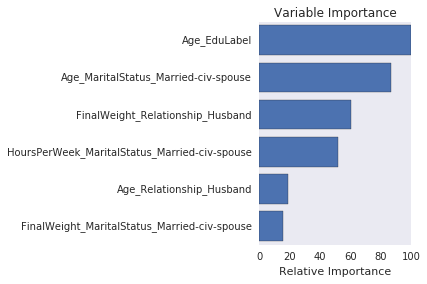

In [210]:
# Adapted from http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[important_idx][sorted_idx[::-1]], align='center')
plt.yticks(pos, important_features[sorted_idx[::-1]])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.draw()
plt.show()

# Remove non-important features from the feature set, and reorder those remaining
#X = X[:, important_idx][:, sorted_idx]

# 6. Testing and Discussion


>> **1. Data Cleaning**
>> 
 **2. Exploratory Data Analysis**
>> 
 **3. Features Selection**
>> 
 **4. Model Implementation**
>> 
 **5. Model Tuning**
> 
 **6. Testing and Discussion**

### We select XGBoost from 4 alogrithms we tried. It has highest accuracy amongst all. using this algorithm on the test data (Income_test)

 * **Subsituting Hyperparameter values in the XGBoost and using it for test data**

In [70]:
# Fitting XGBoost to the training set
from xgboost import XGBClassifier
classifier = XGBClassifier(n_jobs = -1, learning_rate=0.06, max_depth=5 )
classifier.fit(X_selected, Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.06, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [71]:
# Predicting the Test Set results
y_pred = classifier.predict(X_testset)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [72]:
# Confusion matrix for the accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_testset, y_pred)
accuracy = accuracy_score(Y_testset, y_pred)
print("\n The Confusion Matrix is:", cm)
print("\n The accuracy of the model prediction  in percentage is:", accuracy*100)


 The Confusion Matrix is: [[8984    1    2]
 [1941    0    1]
 [1056    1    0]]

 The accuracy of the model prediction  in percentage is: 74.95411313198733


|`Predicted by Model`| <50K          |   50K-100K    | >100K  |
| -------------| ------------- |:-------------:| -----:|
| **Actual**                    |||                       |  
| **<50K**      | 8984      |   1| 2|
|** 50K-100K** | 1941      |   0 |1|
| **>100K** | 1056     |    1 |0|

<div class="alert alert-block alert-info">
#### predictions on the test set are as above, and I got an accuracy of 74.9 %, which is above the expected value. The model is over fitting, as the predictions in category of 50-100K and >100K are zero. which means that the models overfits the target variable and accurately predicts <50K category, while performs very poorly on rest two category

In [73]:
import xgboost as xgb

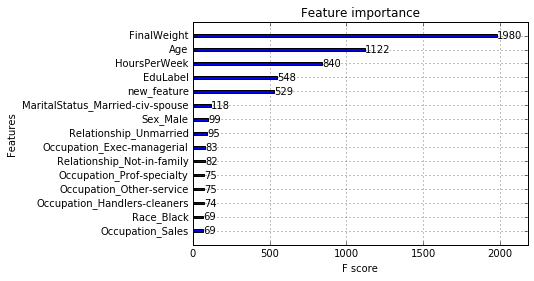

In [74]:
plt.figure(figsize=(50,50))
xgb.plot_importance(classifier , max_num_features = 15)
plt.show()